# LOAN APPROVAL PREDICTION 

## Introduction
In this project, I developed a classification model to predict whether a loan application will be approved or rejected. To improve accuracy, I used two popular machine learning algorithms: Logistic Regression and Support Vector Classifier (SVC). Logistic Regression provides a simple linear approach to model the relationship between input features (such as loan interest rate, persons income, and loan amount) and the loan status(target). On the other hand, SVC is more complex and capable of handling non-linear relationships by finding the optimal hyperplane that separates the two classes. By combining both models, I aimed to leverage their individual strengths and improve overall prediction performance. The models were evaluated based on metrics like accuracy, precision,recalland classification report to ensure robust and reliable loan predictions.

## Environment Setup
First, i will be importing some python libraries i will be working with for this project.

In [1]:
import numpy as np  # transforms data to a 2day array to enable mathmatical operations on them
import pandas as pd  # to load, read into the csv file , and perform data wangling operations
import matplotlib.pyplot as plt  # for visualization of the data
import seaborn as sns  # also for data visualization
from sklearn.model_selection import train_test_split # used to slit data into test and train set
from sklearn.preprocessing import StandardScaler  # used to transform our predictor variables to have a uniform range
from sklearn.linear_model import LogisticRegression # first model used for the classification problem
from sklearn.svm import SVC  # second model used for the classification problem
from imblearn.over_sampling import SMOTE # used to handle imbalance in the dataset
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score  # for accessing model performance
from collections import Counter #to count the number of target variable (y) and the y after oversampling 

# Imported for sanity
import warnings
warnings.filterwarnings('ignore')


## Loading and Exploring Data

The dataset is composed by 32581 rows (observations) and 12 columns (variables).

- person_age: is the age of the person at the time of the loan.

- person_income: is the yearly income of the person at the time of the loan.

- person_home_ownership: is the type of ownership of the home.

- person_emp_length: is the amount of time in years that person is employed.

- loan_intent: is the aim of the loan.

- loan_grade: is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the 
collateral, and the likelihood of repayment of the principal and interest.

- loan_amnt: is the dimension of the loan taken.

- loan_int_rate: is the interest paid for the loan.

- loan_status: is a dummy variable where 1 is default, 0 is not default.

- loan_percent_income: is the ratio between the loan taken and the annual income.

- cb_person_default_on_file: answers whether the person has defaulted before.

- cb_person_cred_hist_length: represents the number of years of personal history since the first loan taken from that person.

In [2]:
# To read into the csv file
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.head(10) #shows the first 10 rows of the dataset. i get to see an overview of what the dataset looks like.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
df.shape #to see the dimensionality of the dataset

(32581, 12)

## Performing some exploratory data analysis on the dataset
Exploratory Data Analysis (EDA) is a crucial step in understanding the structure and relationships within a dataset. It involves summarizing the dataset, checking for missing values, visualizing relationships between variables, and gaining insights that help inform modeling decisions

In [5]:
df.info() # to view data types of each columns,non null and count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe() # a summary statistics of the columns in the dataset

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


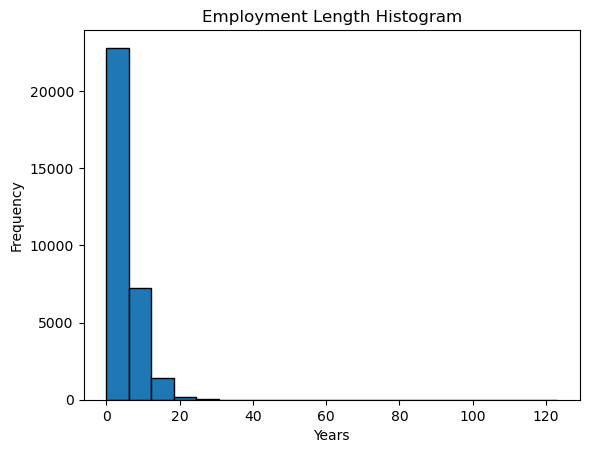

In [7]:

#  A histogram to visualize distribution of numerical feature
plt.hist(df['person_emp_length'], bins=20, edgecolor='black')

# Add titles and labels
plt.title('Employment Length Histogram')
plt.xlabel('Years')
plt.ylabel('Frequency')

# Show the plot
plt.show()


Having noticed some missing datas in the "persons employment length column and loan interest rate, i will be filling them up using the mean for the persons employment lenght. The mean provides an average number of years that people in this company have been employed.This information to some extent can influence their eligibility on accessing loan. whereas for the loan interest rate colunm, its best to assign the missing rates as same with the mean of those on the same loan grade using the loan grade column. 

## Data Preprocessing

In [8]:
# A function that will handle missing data and perform encoding

def data_wrangling(dataframe):
    """
    Cleans and preprocesses a given dataframe by handling missing values 
    and encoding categorical variables.

    Steps performed:
    1. Fills missing values in the 'person_emp_length' column with the column's mean.
    2. Fills missing values in the 'loan_int_rate' column using the mean of 
       the corresponding 'loan_grade' group.
    3. Converts categorical variables into dummy/one-hot encoded variables.

    Parameters:
    dataframe: pd.DataFrame
        The input DataFrame containing the raw data.

    Returns:
    pd.DataFrame
        A processed DataFrame with missing values filled and categorical variables encoded.
    """

    df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())
    df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].transform(lambda x: x.fillna(x.mean()))
    df_encoded = pd.get_dummies(df, dtype = 'float')
    return df_encoded

In [9]:
# assigned the returned encoded dataframe to df_encoded
df_encoded = data_wrangling(df)

In [10]:
df_encoded.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32581 non-null  int64  
 1   person_income                   32581 non-null  int64  
 2   person_emp_length               32581 non-null  float64
 3   loan_amnt                       32581 non-null  int64  
 4   loan_int_rate                   32581 non-null  float64
 5   loan_status                     32581 non-null  int64  
 6   loan_percent_income             32581 non-null  float64
 7   cb_person_cred_hist_length      32581 non-null  int64  
 8   person_home_ownership_MORTGAGE  32581 non-null  float64
 9   person_home_ownership_OTHER     32581 non-null  float64
 10  person_home_ownership_OWN       32581 non-null  float64
 11  person_home_ownership_RENT      32581 non-null  float64
 12  loan_intent_DEBTCONSOLIDATION   

## Next we check for imbalance

In classification problems, imbalanced datasets can significantly affect a model's performance, as the model might become biased toward the majority class. To address this, I analyzed the target variable's distribution to check for imbalance. Identifying an imbalance is critical as it guides the choice of strategies like resampling, class weighting, or advanced techniques to ensure the model achieves better accuracy and fairness across all classes.

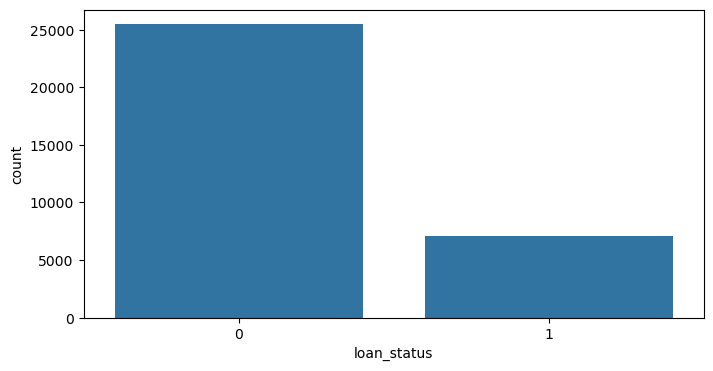

In [12]:
# A plot that display the distribution of the two classes in the target variable.
plt.figure(figsize = (8, 4))
sns.countplot(x = 'loan_status', data = df)
plt.show()

In [13]:
Counter(df_encoded["loan_status"])

Counter({0: 25473, 1: 7108})

##  Model Building

We will define a function that prepares a dataset, handles class imbalance using SMOTE, splits the data into training and testing sets, scales the features, trains the specified model, and evaluates its performance.

In [14]:
# A function to build the model
def build_model(model, df, target_variable):
    """
    Prepares a dataset, handles class imbalance using SMOTE, splits the data into 
    training and testing sets, scales the features, trains the specified model, 
    and evaluates its performance.

    Parameters:
    ----------
    model : object
        The machine learning model to be trained, implementing the `fit` and `predict` methods.
    df : pandas.DataFrame
        The dataset containing features and the target variable.
    target_variable : str
        The name of the target variable column in `df`.

    Returns:
    -------
    report : str
        Classification report summarizing the model's performance on the test set, 
        including precision, recall, F1-score, and support for each class.
    X_train_scaled : numpy.ndarray
        The scaled feature set for the training data.
    y_train : pandas.Series or numpy.ndarray
        The corresponding labels for the training data.

    Notes:
    -----
    - Handles class imbalance using the SMOTE (Synthetic Minority Oversampling Technique) algorithm 
      if the ratio of majority to minority class exceeds 1.3.
    - Scales features using `StandardScaler` to normalize the data for better model performance.
    - Splits the dataset into training and testing sets with an 80-20 split.

    Example:
    -------
    >>> from sklearn.ensemble import RandomForestClassifier
    >>> model = RandomForestClassifier(random_state=42)
    >>> report, X_train_scaled, y_train = build_model(model, df, 'target')
    >>> print(report)
    """
    
    X = df.drop(target_variable, axis = 1) # features
    y = df[target_variable] #labels
    if Counter(y)[0] / Counter(y)[1] > 1.3:
        over_sample = SMOTE(sampling_strategy = 1, random_state = 42, k_neighbors = 3) # initialise SMOTE object with these parameters
        X, y = over_sample.fit_resample(X, y) # Apply SMOTE to generate synthetic data for the minority class
    # splitting data into test and train sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    # initialize scaler,and applies the scaling to the training and testing  dataset
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # initialize model for regression problem andfit train dataset to model for training
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)
    return report, X_train_scaled, y_train

## Evaluating the model performance.

In [15]:
# first we will initialise logistic regression model
lr = LogisticRegression()

In [16]:
# call the function that builds and evaluate the model, then save the output in report1.
report1, X_train_scaled, y_train = build_model(lr, df_encoded, "loan_status")


In [17]:
print(report1)

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      5094
           1       0.82      0.79      0.80      5096

    accuracy                           0.81     10190
   macro avg       0.81      0.81      0.81     10190
weighted avg       0.81      0.81      0.81     10190



## Insight form the classification report
**Class 0 (negative class):**

- Precision = `0.79`: Out of all predicted negatives, `79%` were correct.
- Recall = `0.82`: The model correctly identified `82%` of the actual negatives.
- F1-Score = `0.81`: A balance between precision and recall.
- Support = `5094`: There were `5094` actual negatives in the dataset.

**Class 1 (positive class):**

- Precision = `0.82`: Out of all predicted positives, `82%` were correct.
- Recall = `0.79`: The model correctly identified `79%` of the actual positives.
- F1-Score = `0.80`: A balance between precision and recall.
- Support = `5096`: There were `5096` actual positives in the dataset.

#### Overall Metrics

**Accuracy** = `0.81`: The model correctly classified `81%` of all instances.

Accuracy = `Correct Predictions/Total Predictions`

 
#### Macro Average

Averages the precision, recall, and F1-score across classes equally, giving each class the same weight.

In this case, Precision = Recall = F1 = `0.81`.
#### Weighted Average:

Averages the metrics but gives more weight to classes with more instances (based on `support`).

Here, it matches the macro average because both classes have roughly equal support.
### Key Insights
**Balanced Performance:** The precision, recall, and F1-scores are similar for both classes, indicating balanced performance.

**Good Overall Accuracy:** With 81% accuracy, the model performs well but has room for improvement.

**Trade-offs:** There’s a slight trade-off between precision and recall for both classes. For example, the model is slightly better at avoiding false negatives for class 0 and false positives for class 1.

## Next Steps: Improving Accuracy with Support Vector Machines (SVM)
To further enhance the model's performance and accuracy, the next logical step is to experiment with Support Vector Machines (SVM). SVMs are powerful algorithms, especially for binary classification problems, as they aim to find the optimal hyperplane that best separates the data into classes.

#### Why Use SVM?
- Effective in High Dimensional Spaces: SVM performs well even when the number of features is greater than the number of samples.
- Robust to Outliers: By using kernels and soft margins, SVM can handle outliers and still create a reliable decision boundary.
- Flexibility with Kernels: SVM can utilize linear or non-linear kernels (e.g., RBF, polynomial), allowing it to capture complex relationships in data.
- Focus on Support Vectors: Instead of focusing on all the data points, SVM focuses on the critical data points (support vectors), which define the decision boundary.
  
Lets Implement SVC, calling the `build_model` function with svm as argurment.

In [18]:
# initialise support vector classifier
svm = SVC()

In [19]:
report2, X_train_scaled, y_train = build_model(svm, df_encoded, "loan_status")

In [20]:
print(report2)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      5094
           1       0.97      0.87      0.92      5096

    accuracy                           0.92     10190
   macro avg       0.93      0.92      0.92     10190
weighted avg       0.93      0.92      0.92     10190



## Key Improvements
- Higher Recall for Class 0: The model is now better at identifying negatives while maintaining strong precision.
- Improved F1-Scores: The F1-scores indicate a better balance between precision and recall, especially for the minority class.
- Increased Accuracy: Overall accuracy has improved from 81% to 92%, reflecting the effectiveness of SVM in separating the classes.

Using SVM has substantially improved the model's ability to classify both classes, especially by reducing misclassifications. The enhanced precision and recall make this model a reliable choice for applications requiring both sensitivity and specificity.

In [21]:
# # Compute permutation importance
# from sklearn.inspection import permutation_importance
# results = permutation_importance(svm, X_train_scaled, y_train, n_repeats=3, random_state=42)

# for i, importance in enumerate(results.importances_mean):
#     print(f"Feature {i+1}: {importance}")

In [ ]:
# Importing the pickle library
import pickle

# Save the model just like we would a Python file
model_save_path = "svm_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svm,file)

# Conclusion
In this notebook, we developed and evaluated a robust classification model to address the given problem statement. Here's a summary of the steps and key outcomes:

### Data Preparation
We began by cleaning the dataset, handling class imbalances using SMOTE, and scaling the features to ensure compatibility with the SVM model.

### Model Selection and Training
After evaluating multiple approaches, we used an SVM classifier to achieve higher accuracy. The SVM model demonstrated strong performance with an overall accuracy of 92%, and a balanced precision-recall score, highlighting its ability to generalize well across both classes.

### Model Saving
The trained SVM model was saved as a serialized object, making it ready for deployment. This allows for seamless integration into real-world applications where accurate predictions are critical.

## Next Steps
### Model Deployment
The saved model can now be deployed into a production environment using APIs, dashboards, or other interfaces to provide real-time predictions.
### Further Optimization
Additional hyperparameter tuning or testing with ensemble methods may further enhance the model's performance.
### Domain-Specific Insights
Use the insights gained from the feature analysis to guide decision-making and refine the problem-solving approach.
With this completed workflow, we have established a strong foundation for solving classification problems in this domain.